In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_breast_cancer

from matplotlib.colors import ListedColormap

In [ ]:
fruits = pd.read_table('/content/drive/MyDrive/fruit_data_with_colors.txt')

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
Y_fruits = fruits['fruit_label']

In [ ]:
Y_fruits.unique()

array([1, 2, 3, 4])

In [ ]:
target_name_fruit=['apple', 'mandarin', 'orange', 'lemon']

In [ ]:
#랜덤포레스트로 분류 및 시각화
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fruits.values, Y_fruits.values, random_state=0)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
print(rf_clf.score(X_train, Y_train))
print(rf_clf.score(X_test, Y_test))

1.0
0.8


In [ ]:
##1. bagging 사용하여 훈련시킨 후 결과를 인쇄하기

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=30, n_jobs=-1)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=30,
                  n_estimators=500, n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.8666666666666667

In [ ]:
##2. XGboost를 사용하여 훈련시킨 후 결과를 인쇄하기

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
Y_train

array([3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3,
       1, 4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4])

In [ ]:
type(Y_train)

numpy.ndarray

In [ ]:
Y_train = np.where(Y_train==1, 0, Y_train)

In [ ]:
Y_train

array([3, 4, 2, 0, 3, 4, 3, 3, 4, 0, 4, 3, 0, 2, 3, 0, 4, 0, 4, 0, 0, 3,
       0, 4, 4, 4, 3, 0, 0, 4, 3, 2, 0, 3, 0, 0, 0, 3, 4, 2, 0, 4, 4, 4])

In [ ]:
Y_train = np.where(Y_train==2, 1, Y_train)
Y_train = np.where(Y_train==3, 2, Y_train)
Y_train = np.where(Y_train==4, 3, Y_train)

In [ ]:
##

In [ ]:
path = '/content/drive/MyDrive/fruit_data_with_colors.txt'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
fruits = pd.read_table(path)

X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
Y_fruits = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X_fruits, Y_fruits, test_size=0.2)

In [ ]:
X_train.head()

,height,width,mass,color_score
19,7.2,7.4,162,0.85
43,10.3,7.2,194,0.70
57,8.5,6.5,152,0.72
21,7.4,7.4,156,0.84
38,7.8,7.2,158,0.77


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.fit_transform(X_test)

In [ ]:
X_train_sca

array([[0.49230769, 0.42105263, 0.3006993 , 0.78947368],
       [0.96923077, 0.36842105, 0.41258741, 0.39473684],
       [0.69230769, 0.18421053, 0.26573427, 0.44736842],
       [0.52307692, 0.42105263, 0.27972028, 0.76315789],
       [0.58461538, 0.36842105, 0.28671329, 0.57894737],
       [0.8       , 1.        , 1.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.68421053],
       [0.49230769, 0.36842105, 0.27272727, 0.71052632],
       [0.56923077, 0.13157895, 0.13986014, 0.44736842],
       [0.83076923, 0.84210526, 0.93006993, 0.52631579],
       [0.56923077, 0.39473684, 0.30769231, 0.39473684],
       [0.8       , 0.44736842, 0.44755245, 0.57894737],
       [1.        , 0.39473684, 0.43356643, 0.44736842],
       [0.72307692, 0.        , 0.1958042 , 0.47368421],
       [0.53846154, 0.34210526, 0.27272727, 0.60526316],
       [0.58461538, 0.47368421, 0.23076923, 0.52631579],
       [0.63076923, 0.02631579, 0.13986014, 0.47368421],
       [0.63076923, 0.44736842,

In [ ]:
from sklearn.model_selection import cross_val_score

clf=KNeighborsClassifier(n_neighbors=5)
X = X_train_sca
Y = Y_train

In [ ]:
cv_score = cross_val_score(clf, X, Y)
print(f"Cross-Valid-score {cv_score}")
print(f"mean : {np.mean(cv_score)}")

Cross-Valid-score [0.8        0.9        0.88888889 1.         0.77777778]
mean : 0.8733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
##검증곡선

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [ ]:
param_range = np.logspace(-3, 3, 4)  #감마의 범위
train_score, test_score = validation_curve(SVC(), X, Y, param_name='gamma', param_range=param_range, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


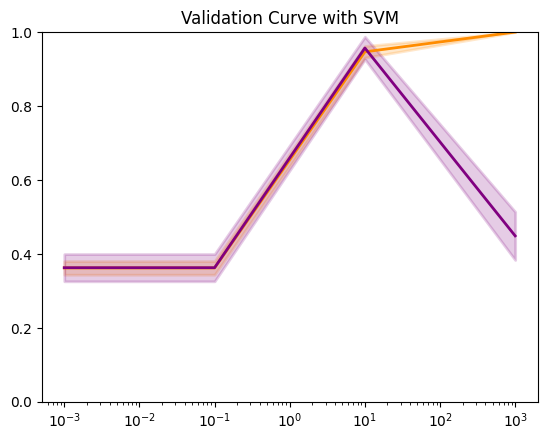

In [ ]:
plt.figure()

#학습, 테스트 스코어의 평균과 표준편차
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

#그래프의 틀을 만들어주기 위해 세팅
#타이틀, y축 범위
plt.title("Validation Curve with SVM")
plt.ylim(0, 1)
lw = 2

#X축 값이 0.001 ~ 1000까지의 값 (param_range)
#Y축 값이 train_scores_mean
plt.semilogx(param_range, train_scores_mean, label='Training Score', color='darkorange', lw=lw) #라인의 두께

plt.fill_between(param_range,train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='darkorange', lw=lw) #알파는 얼마나 투명하게 할 것인가

plt.semilogx(param_range, test_scores_mean, label='Training Score', color='purple', lw=lw) #라인의 두께

plt.fill_between(param_range,test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='purple', lw=lw)

plt.show()


#파라미터의 변화 추적 가능. 10이 가장 최선의 파라미터.

In [ ]:
from sklearn.datasets import load_digits

dataset = load_digits()
X, Y = dataset.data, dataset.target

for cls, clc in zip(dataset.target_names, np.bincount(dataset.target)):
  print(cls, clc)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [ ]:
#1만 남기고 1이 아닌 다른 것은 0으로 표시하는 데이터셋
y_binary_imbalanced = Y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print(f"original_ : {Y[1:30]}")
print(f"imbalanced_ : {y_binary_imbalanced[1:30]}")

original_ : [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
imbalanced_ : [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binary_imbalanced)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

0.9955555555555555

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

train_s, train_score, valid_score = learning_curve(svm, X_train, Y_train, cv=5, scoring='accuracy')

In [ ]:
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1) #std : 표준편차
valid_score_mean = np.mean(valid_score, axis=1)
valid_score_std = np.std(valid_score, axis=1)

y_pred = svm.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(Y_test, y_pred)

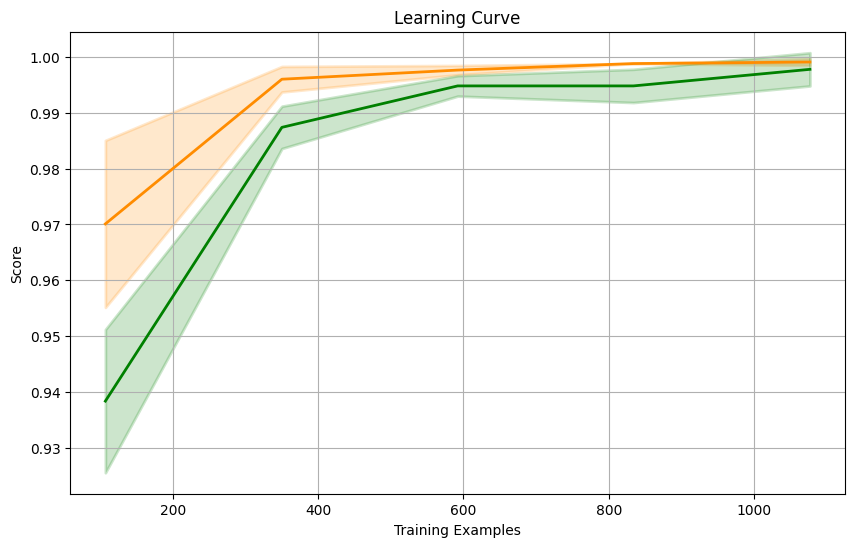

In [ ]:
#그래프 그리기
plt.figure(figsize=(10,6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_s, train_score_mean, label='Training Examples', color='darkorange', lw=lw) #plot 그래프의 종류

plt.fill_between(train_s,train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.2, color='darkorange', lw=lw) #알파는 얼마나 투명하게 할 것인가

plt.plot(train_s, valid_score_mean, label='Training Examples', color='green', lw=lw) #plot 그래프의 종류

plt.fill_between(train_s,valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.2, color='green', lw=lw)

plt.show()

#공부한 데이터셋이 많을수록 스코어가 1에 가까워진다.

In [ ]:
#더미 클래시파이어
#인풋 데이터를 신경쓰지 않고(학습하지 않고) 추측함. 데이터셋의 구성이 잘못 되지 않았는지 판단을 도와주는 역할

In [ ]:
from sklearn.dummy import DummyClassifier

#most_frequent : 훈련 세트에서 가장 자주 나타나는 라벨로 대답
#stratified : 훈련 세트의 클래스 분포를 따르도록 무작위로 대답
#uniform : 클래스 레이블을 균등하게 랜덤으로 대답
#constant : 특정 상수로 대답

In [ ]:
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
y_dummy_pred = dummy_major.predict(X_test)

In [ ]:
y_dummy_pred #0이 가장 자주 나타나므로 0이라고 대답함.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dummy_major.score(X_test, Y_test) #가장 자주 나타난 것을 말했을 뿐인데 스코어가 높게 나왔음. 뭔가 잘못되었다는 의미

0.8888888888888888

In [ ]:
#혼동행렬과 스코어

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
digits = load_digits()
X, Y = dataset.data, dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, Y_train)

tree_pred = dt.predict(X_test)

In [ ]:
confusion_mat = confusion_matrix(Y_test, tree_pred)

In [ ]:
print(f"Acc : {accuracy_score(Y_test, tree_pred)}")
print(f"Precision : {precision_score(Y_test, tree_pred)}")
print(f"Recall : {recall_score(Y_test, tree_pred)}")
print(f"F1score : {f1score(Y_test, tree_pred)}")